<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/class(Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [49]:
from scipy.stats.distributions import chi_gen
class numeric :
  def __init__(self):
    self.df = 0
    self.data_IQR2 = 0
    self.train_test_data = 0
    self.Y_value = 0
    self.Y_test = 0
  
  def read_file(self, file_address) :
    print("file read")
    self.df = pd.read_csv(file_address, encoding = "cp949")
  
  def normalization(self, column_number):
    print("normalization")
    self.df[self.df.columns[column_number]] = np.log1p(self.df[self.df.columns[column_number]])
    sns.distplot(self.df[self.df.columns[column_number]])

  def data_IQR(self, column_number) :
    print("-------------- Data_IQR ---------------")
    q1 = self.df[self.df.columns[column_number]].quantile(q=0.25)
    q3 = self.df[self.df.columns[column_number]].quantile(q=0.75)
    IQR = q3-q1
    self.data_IQR2 = self.df[(self.df[self.df.columns[column_number]] < q3 + IQR * 1.5) & 
                 (self.df[self.df.columns[column_number]] > q1 - IQR * 1.5)]
    sns.distplot(self.df[self.df.columns[column_number]])
    self.df = self.data_IQR2

  def before_making_model(self, X_list,Y_list,column_number):
    num = X_list
    cg = Y_list
    X = self.df[num+cg]
    Y = self.df[self.df.columns[column_number]]
    X_train, X_test, Y_train, self.Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    ct = ColumnTransformer([("scaling", StandardScaler(), num), 
                        ("onehot", OneHotEncoder(sparse = False), cg)])
    ct.fit(X_train)
    X_train = ct.transform(X_train)
    X_test = ct.transform(X_test)
    self.train_test_data = [X_train, X_test, Y_train, self.Y_test]

  def linearRegress(self, train_test_data,columns):
    print("----------LinearRegression value-----------")
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr = LinearRegression().fit(X_train, Y_train) 
    Y_pred = lr.predict(X_test)
    print("predict value\n",Y_pred)
    print("[linear]")
    print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
    print("test R2 : {:.3f}".format(lr.score(X_test, self.Y_test))) 
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred)) 
    print("RMSE : {:.3f}". format(rmse)) 
    print(columns)
    print("절편", np.round(lr.intercept_, 3))
    print("가중치(beta)", np.round(lr.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]

  def Reset_index(self, Y_test,column_number):
    self.Y_test = (pd.DataFrame(self.Y_test)).reset_index()
    self.Y_test = pd.DataFrame(self.Y_test[x.df.columns[column_number]])
  
  def plot_picture(self, Y_pred,Y_test):
    print("----------- plot grow----------- ")
    %matplotlib Inline
    plt.plot(Y_pred)
    plt.plot(self.Y_test)

  def Ridge_function(self,train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
    Y_pred = lr_ridge.predict(X_test)
    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("[ridge]")
    print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
    print("RMSE : {:.3f}".format(rmse))
    print("절편", np.round(lr_ridge.intercept_, 3))
    print("가중치(beta)", np.round(lr_ridge.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]

  def Lasso_function(self, train_test_data):
    X_train, X_test, Y_train, self.Y_test = self.train_test_data
    lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
    Y_pred = lr_lasso.predict(X_test)

    rmse = sqrt(mean_squared_error(self.Y_test, Y_pred))
    print("[lasso]")
    print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
    print("RMSE : {:.3f}".format(rmse))
    print("절편", np.round(lr_lasso.intercept_, 3))
    print("가중치(beta)", np.round(lr_lasso.coef_, 3))
    self.Y_value = [Y_pred, self.Y_test]


   

    


file read
normalization
-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


----------LinearRegression value-----------
predict value
 [2.71913822 2.62432822 2.613266   2.70548349 2.59341166 2.69499437
 2.69708915 2.62089431 2.66328822 2.61088496 2.70680497 2.67125581
 2.60031538 2.69372751 2.6733051  2.60392207 2.60516959 2.70160996
 2.66331215 2.69185393 2.58746476 2.68639797 2.70106348 2.60193194
 2.60849248 2.68776109 2.60149185 2.59820822 2.59634722 2.66160212
 2.66342275 2.60213028 2.67937124 2.68369064 2.68067752 2.70277363
 2.70142404 2.70728012 2.59243212 2.67324453 2.70261252 2.66758175
 2.68340784 2.66428835]
[linear]
train R2 : 0.124
test R2 : -0.009
RMSE : 0.125
Index(['ID', 'Year', 'Y', 'X1', 'X2', 'X3', 'X4'], dtype='object')
절편 2.659
가중치(beta) [ 0.008 -0.001 -0.    -0.002  0.037 -0.055  0.029  0.034  0.013 -0.063
  0.012  0.045 -0.051]
----------- plot grow----------- 


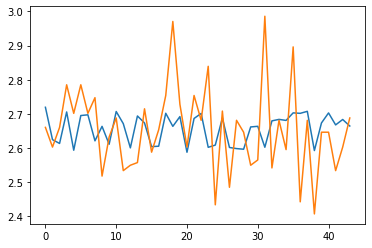

In [53]:
x = numeric()
x.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x.normalization(2)
x.data_IQR(2)
x.before_making_model([x.df.columns[3],x.df.columns[4],x.df.columns[5], x.df.columns[6]],[x.df.columns[1]],2)

x.linearRegress(x.train_test_data, x.df.columns)
x.Reset_index(x.Y_value[1],2)
x.plot_picture(x.Y_value[0],x.Y_test)

file read
normalization
-------------- Data_IQR ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[ridge]
ridge R2 : 0.123
RMSE : 0.125
절편 2.659
가중치(beta) [ 0.009 -0.001 -0.001 -0.002  0.033 -0.051  0.026  0.03   0.012 -0.057
  0.011  0.043 -0.046]
----------- plot grow----------- 


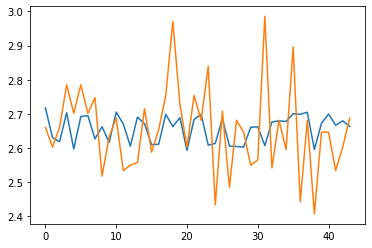

In [55]:
x2 = numeric()
x2.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x2.normalization(2)
x2.data_IQR(2)
x2.before_making_model([x2.df.columns[3],x2.df.columns[4],x2.df.columns[5], x2.df.columns[6]],[x2.df.columns[1]],2)

x2.Ridge_function(x2.train_test_data)
x2.Reset_index(x2.Y_value[1],2)
x2.plot_picture(x2.Y_value[0],x.Y_test)

file read
normalization
-------------- Data_IQR ---------------
[lasso]
lasso R2 : 0.004
RMSE : 0.125
절편 2.661
가중치(beta) [ 0.003  0.    -0.    -0.     0.    -0.     0.     0.     0.    -0.
  0.     0.    -0.   ]
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


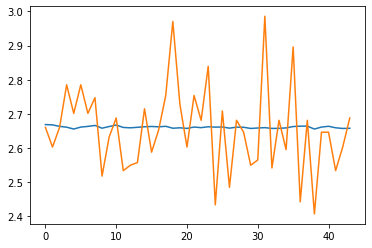

In [56]:
x3 = numeric()
x3.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x3.normalization(2)
x3.data_IQR(2)
x3.before_making_model([x3.df.columns[3],x3.df.columns[4],x3.df.columns[5], x3.df.columns[6]],[x2.df.columns[1]],2)

x3.Lasso_function(x3.train_test_data)
x3.Reset_index(x3.Y_value[1],2)
x3.plot_picture(x3.Y_value[0],x.Y_test)